In [1]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
rename = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

dados = dados.rename(columns=rename)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
change = {
    'yes' : 1,
    'no' : 0
}

dados['vendido'] = dados['vendido'].map(change)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados['ano_do_modelo']
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [5]:
dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [6]:
dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], inplace=True)

In [7]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [8]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

semente = 5
np.random.seed(semente)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

c:\Users\Gabriel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


46.88

In [9]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
previsoes_dummy = dummy_stratified.predict(teste_x)


acuracia = accuracy_score(teste_y, previsoes_dummy) * 100
acuracia

57.99999999999999

In [11]:
dummy_stratified.score(teste_x, teste_y) * 100

57.99999999999999

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

76.08

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

78.84

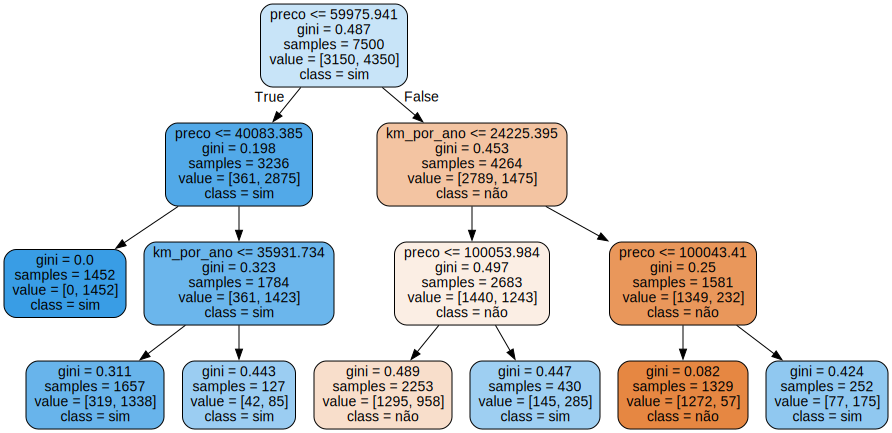

In [24]:
from sklearn.tree import export_graphviz
# para visualizarmos o gráfico é necessário outra biblioteca
import graphviz

# out_file é se desejamos salvar o resultado em um arquivo
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, filled=True, rounded=True, class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico